In [1]:
from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np

from keras.applications import vgg16
from keras.preprocessing.image import load_img,img_to_array
from keras.models import Model
from keras.applications.imagenet_utils import preprocess_input


from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

In [2]:
imgs_path = "/Users/venkateshvaidyanathan/Documents/ASU fall-2020 subjects/SML/Project/fashion-dataset/images/"
imgs_model_width, imgs_model_height = 224, 224
nb_closest_images = 5

In [3]:
files = [imgs_path + x for x in os.listdir(imgs_path) if "jpg" in x]

print("Total number of images:",len(files))


Total number of images: 44441


In [5]:
#For reducing compilation time of the algorithm, we reduce the data to 5000 images or the system crashes!
files=files[0:5000]

# Testing feature extraction with one image

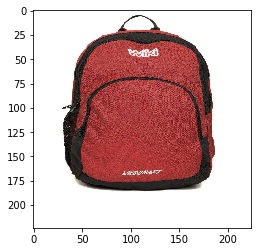

Image loaded successfully!


In [6]:
original = load_img(files[9], target_size=(imgs_model_width, imgs_model_height))
plt.imshow(original)
plt.show()
print("Image loaded successfully!")

In [7]:
# load the model
vgg_model = vgg16.VGG16(weights='imagenet')

# remove the last layers in order to get features instead of predictions
feat_extractor = Model(inputs=vgg_model.input, outputs=vgg_model.get_layer("fc2").output)

# print the layers of the CNN
feat_extractor.summary()

553467904/553467096 [==============================] - 115s 0us/step
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
___________________________________________________

In [8]:
numpy_image = img_to_array(original)
# convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# we want the input matrix to the network to be of the form (batchsize, height, width, channels)
# thus we add the extra dimension to the axis 0.
image_batch = np.expand_dims(numpy_image, axis=0)
print('Image Batch size', image_batch.shape)

# prepare the image for the VGG model
processed_image = preprocess_input(image_batch.copy())

Image Batch size (1, 224, 224, 3)


In [9]:
img_features = feat_extractor.predict(processed_image)

print("Features successfully extracted for one image!")
print("Number of image features:",img_features.size)
img_features

Features successfully extracted for one image!
Number of image features: 4096


array([[0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# Because the algorithm works for one image, it should work for a batch of images, let us try!

In [10]:
importedImages = []

for f in files:
    filename = f
    original = load_img(filename, target_size=(224, 224))
    numpy_image = img_to_array(original)
    image_batch = np.expand_dims(numpy_image, axis=0)
    
    importedImages.append(image_batch)
    
images = np.vstack(importedImages)

processed_imgs = preprocess_input(images.copy())

In [11]:
imgs_features = feat_extractor.predict(processed_imgs)

print("features successfully extracted!")
imgs_features.shape


features successfully extracted!


(5000, 4096)

In [13]:
cosSimilarities = cosine_similarity(imgs_features)

# store the results into a pandas dataframe

cos_similarities_df = pd.DataFrame(cosSimilarities, columns=files, index=files)
cos_similarities_df.head()

,/Users/venkateshvaidyanathan/Documents/ASU fall-2020 subjects/SML/Project/fashion-dataset/images/9733.jpg,/Users/venkateshvaidyanathan/Documents/ASU fall-2020 subjects/SML/Project/fashion-dataset/images/14147.jpg,/Users/venkateshvaidyanathan/Documents/ASU fall-2020 subjects/SML/Project/fashion-dataset/images/52112.jpg,/Users/venkateshvaidyanathan/Documents/ASU fall-2020 subjects/SML/Project/fashion-dataset/images/6400.jpg,/Users/venkateshvaidyanathan/Documents/ASU fall-2020 subjects/SML/Project/fashion-dataset/images/34297.jpg,/Users/venkateshvaidyanathan/Documents/ASU fall-2020 subjects/SML/Project/fashion-dataset/images/24084.jpg,/Users/venkateshvaidyanathan/Documents/ASU fall-2020 subjects/SML/Project/fashion-dataset/images/12536.jpg,/Users/venkateshvaidyanathan/Documents/ASU fall-2020 subjects/SML/Project/fashion-dataset/images/54563.jpg,/Users/venkateshvaidyanathan/Documents/ASU fall-2020 subjects/SML/Project/fashion-dataset/images/15259.jpg,/Users/venkateshvaidyanathan/Documents/ASU fall-2020 subjects/SML/Project/fashion-dataset/images/35189.jpg,...,/Users/venkateshvaidyanathan/Documents/ASU fall-2020 subjects/SML/Project/fashion-dataset/images/22636.jpg,/Users/venkateshvaidyanathan/Documents/ASU fall-2020 subjects/SML/Project/fashion-dataset/images/54978.jpg,/Users/venkateshvaidyanathan/Documents/ASU fall-2020 subjects/SML/Project/fashion-dataset/images/34054.jpg,/Users/venkateshvaidyanathan/Documents/ASU fall-2020 subjects/SML/Project/fashion-dataset/images/23528.jpg,/Users/venkateshvaidyanathan/Documents/ASU fall-2020 subjects/SML/Project/fashion-dataset/images/14384.jpg,/Users/venkateshvaidyanathan/Documents/ASU fall-2020 subjects/SML/Project/fashion-dataset/images/24521.jpg,/Users/venkateshvaidyanathan/Documents/ASU fall-2020 subjects/SML/Project/fashion-dataset/images/15924.jpg,/Users/venkateshvaidyanathan/Documents/ASU fall-2020 subjects/SML/Project/fashion-dataset/images/34732.jpg,/Users/venkateshvaidyanathan/Documents/ASU fall-2020 subjects/SML/Project/fashion-dataset/images/8188.jpg,/Users/venkateshvaidyanathan/Documents/ASU fall-2020 subjects/SML/Project/fashion-dataset/images/1812.jpg
/Users/venkateshvaidyanathan/Documents/ASU fall-2020 subjects/SML/Project/fashion-dataset/images/9733.jpg,1.000000,0.403080,0.440588,0.227759,0.409437,0.226870,0.492753,0.559469,0.207537,0.224102,...,0.240691,0.450682,0.317032,0.203835,0.248058,0.514831,0.210148,0.212751,0.683042,0.718231
/Users/venkateshvaidyanathan/Documents/ASU fall-2020 subjects/SML/Project/fashion-dataset/images/14147.jpg,0.403080,1.000000,0.276855,0.401433,0.345841,0.350273,0.301305,0.322323,0.382951,0.367703,...,0.356174,0.316190,0.375743,0.491866,0.402336,0.297997,0.342488,0.372908,0.353788,0.463440
/Users/venkateshvaidyanathan/Documents/ASU fall-2020 subjects/SML/Project/fashion-dataset/images/52112.jpg,0.440588,0.276855,1.000000,0.158934,0.600627,0.260556,0.509518,0.495340,0.159091,0.230588,...,0.308061,0.438121,0.264569,0.233453,0.246668,0.748022,0.184413,0.200165,0.442882,0.418129
/Users/venkateshvaidyanathan/Documents/ASU fall-2020 subjects/SML/Project/fashion-dataset/images/6400.jpg,0.227759,0.401433,0.158934,1.000000,0.229645,0.550328,0.225788,0.160509,0.652667,0.305093,...,0.277319,0.227170,0.243819,0.197182,0.637561,0.204585,0.249664,0.575305,0.255116,0.230381
/Users/venkateshvaidyanathan/Documents/ASU fall-2020 subjects/SML/Project/fashion-dataset/images/34297.jpg,0.409437,0.345841,0.600627,0.229645,1.000000,0.265851,0.591233,0.534551,0.240248,0.279915,...,0.344807,0.435969,0.411381,0.235039,0.295391,0.710159,0.271976,0.274555,0.508758,0.415415


In [14]:
# function to retrieve the most similar products for a given one

def retrieve_most_similar_products(given_img):

    print("-----------------------------------------------------------------------")
    print("original product:")

    original = load_img(given_img, target_size=(imgs_model_width, imgs_model_height))
    plt.imshow(original)
    plt.show()

    print("-----------------------------------------------------------------------")
    print("most similar products:")

    closest_imgs = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1].index
    closest_imgs_scores = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1]

    for i in range(0,len(closest_imgs)):
        original = load_img(closest_imgs[i], target_size=(imgs_model_width, imgs_model_height))
        plt.imshow(original)
        plt.show()
        print("similarity score : ",closest_imgs_scores[i])

-----------------------------------------------------------------------
original product:


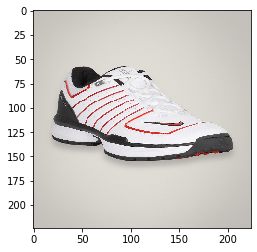

-----------------------------------------------------------------------
most similar products:


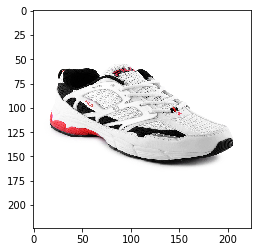

similarity score :  0.82736194


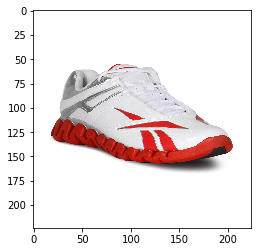

similarity score :  0.8242234


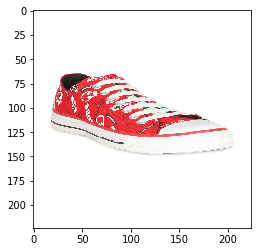

similarity score :  0.81228924


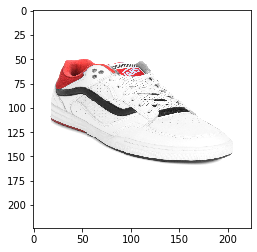

similarity score :  0.8105899


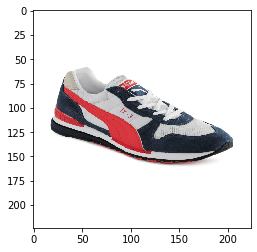

similarity score :  0.79612243


In [15]:
retrieve_most_similar_products(files[465])

-----------------------------------------------------------------------
original product:


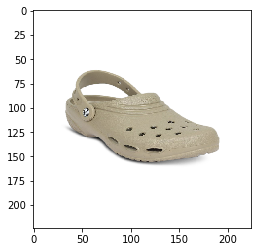

-----------------------------------------------------------------------
most similar products:


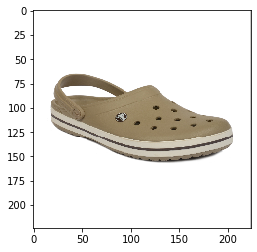

similarity score :  0.87305033


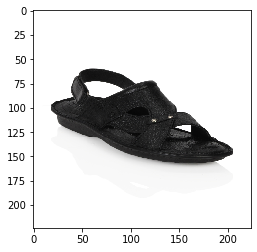

similarity score :  0.7592793


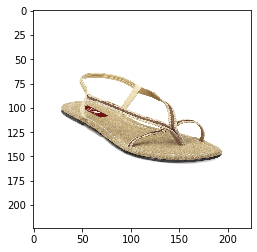

similarity score :  0.7580079


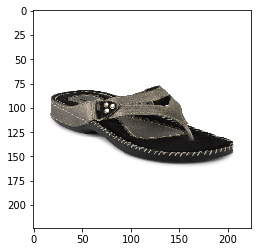

similarity score :  0.7574487


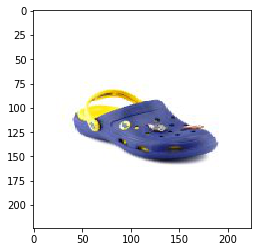

similarity score :  0.75098073


In [16]:
retrieve_most_similar_products(files[50])

# Data Analysis and VIsualization